In [2]:
## Discrete Heat Equation

## Idea: temperature at point P moves 
##       towards average temperature near P

## Represent the discretized temperature field
## by a 2x2 matrix of floats in [0,1]
## Call this the 'state'.
## 
## The state at a point P is state[i][j] for 
## some integers i, j.  The average temnperature
## nearby is 
##
##  average[i][j] = 
##  (state[i-1][j] + state[i+1][j] + state[i][j-1] + state[i][j+1])/4 
##
## Define a dynamical system f : States -> States
## where temperature values in f(state) have moved
## towards the average nearby temperature.  We can use
## this rule:
##
##    next_state[i][j] = (1- beta)*state[i][j] + beta*average[i][j]
##
## Here beta is the _diffusion coefficient_.  The system is 
## stable if 0 <= beta < 1.  If beta = 0, the system does not
## change from one moment to the next.  The larger beta, the
## faster the system evolves.

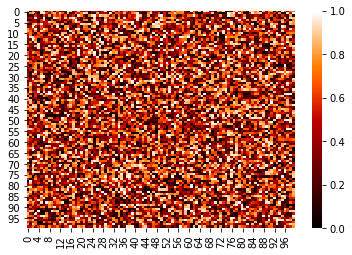

In [1]:
# Imports
import numpy as np
import seaborn as sea
import matplotlib.pylab as plt
import math
import imageio
%matplotlib inline

# Parameters
dim = 100
beta = 0.5

# Initial state
state = np.random.rand(dim, dim)

# Display state
def show(state):
       ax = sea.heatmap(state, cmap="gist_heat")
       plt.show()
    
show(state)

In [137]:
state[0][0]   ## state is a 2D array

0.9010926681753277

In [5]:
# The dynamical system: compute next state

def next_state(state):
    ns = state.copy() 
    for i in range(1,dim-1):
        for j in range(1,dim-1):
            s = state[i-1][j] + state[i+1][j] + state[i][j-1] + state[i][j+1] 
            ns[i][j] = (1 - beta)*state[i][j]  + beta*(s/4)
    return ns
             

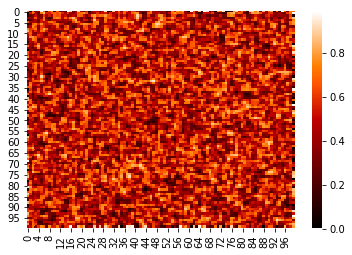

In [6]:
# Test the next_state function

state2 = next_state(state)
show(state2)

In [141]:
# Save the state in an image file
# This requires one to put the 
# data in the right form

def save_image(data, name):
    reds = (255*data).astype(np.uint8)
    zz = np.zeros((dim,dim)).astype(np.uint8)
    img = np.dstack((reds, zz, zz))
    imageio.imwrite(name, img)
    
save_image(state, 'heat.png')
save_image(state2, 'heat2.png')

In [78]:
# Iterate the next-state map

def iterate(f, initial_state, n):
    state = initial_state
    for i in range(0,n):
        state = f(state)
    return state
        

In [149]:
# Test it

state20 = iterate(next_state, state, 20)

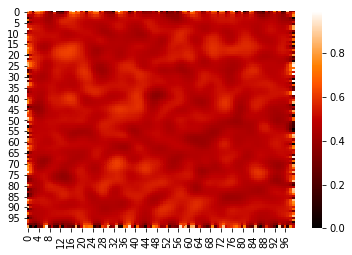

In [151]:
# Display the result and save it as
# an image

show(state20)
save_image(state20, 'heat20.jpg')

In [69]:
array = np.zeros([100, 200, 3], dtype=np.uint8) 
array[:,:100] = [255, 128, 0] #Orange left side array[:,100:] = [0, 0, 255] #Blue right side